# Initial exploration of the ACN-Data API

Uses the HTTP API of the [ACN-Data](https://ev.caltech.edu/dataset) to download the data and inspect it.

Note, this requires an API Token for the ACN-Data API to be set as the `ACN_DATA_API_TOKEN` environment variable, or provided as a parameter if using [papermill](https://papermill.readthedocs.io/en/latest/index.html) to run the notebook.

In [65]:
import datetime
import os
import pandas as pd
import pprint
import seaborn as sns

from acnportal.acndata import DataClient

In [2]:
ACN_DATA_API_URL = 'https://ev.caltech.edu/api/v1/'
ACN_DATA_API_TOKEN = os.getenv('ACN_DATA_API_TOKEN')
START_TIME = '2019-05-01T00:00:00+00:00'  # ISO Format
END_TIME = '2019-05-02T00:00:00+00:00'    # ISO Format

In [18]:
client = DataClient(ACN_DATA_API_TOKEN, ACN_DATA_API_URL)

res = client.get_sessions_by_time(
    'caltech',
    start=datetime.datetime.fromisoformat(START_TIME),
    end=datetime.datetime.fromisoformat(END_TIME),
)

data = list(res)

print(f"{len(data)} rows collected")

44 rows collected


In [19]:
pprint.pprint(data[0])

{'_id': '5cde00a7f9af8b123b067201',
 'clusterID': '0039',
 'connectionTime': datetime.datetime(2019, 4, 30, 18, 18, 34, tzinfo=<DstTzInfo 'America/Los_Angeles' PDT-1 day, 17:00:00 DST>),
 'disconnectTime': datetime.datetime(2019, 4, 30, 19, 45, 36, tzinfo=<DstTzInfo 'America/Los_Angeles' PDT-1 day, 17:00:00 DST>),
 'doneChargingTime': datetime.datetime(2019, 4, 30, 19, 45, 31, tzinfo=<DstTzInfo 'America/Los_Angeles' PDT-1 day, 17:00:00 DST>),
 'kWhDelivered': 4.804,
 'sessionID': '2_39_138_29_2019-05-01 01:18:34.430773',
 'siteID': '0002',
 'spaceID': 'CA-304',
 'stationID': '2-39-138-29',
 'timezone': 'America/Los_Angeles',
 'userID': '000001164',
 'userInputs': [{'WhPerMile': 525,
                 'kWhRequested': 10.5,
                 'milesRequested': 20,
                 'minutesAvailable': 236,
                 'modifiedAt': 'Wed, 01 May 2019 01:19:53 GMT',
                 'paymentRequired': True,
                 'requestedDeparture': 'Wed, 01 May 2019 05:14:34 GMT',
          

In [ ]:
df = pd.DataFrame(data)

# naive unpacking of 'userInputs' list
for k in data[0]['userInputs'][0]:
    df[k] = [v[0].get(k) if v else None for v in df.userInputs.values.tolist()]
df.head()

<AxesSubplot:xlabel='kWhDelivered', ylabel='kWhRequested'>

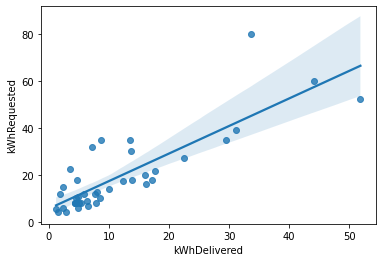

In [68]:
sns.regplot(x = df['kWhDelivered'], y = df['kWhRequested'])